## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

Dataset: https://github.com/zalandoresearch/fashion-mnist

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* Label	Description
    + 0	T-shirt/top
    + 1	Trouser
    + 2	Pullover
    + 3	Dress
    + 4	Coat
    + 5	Sandal
    + 6	Shirt
    + 7	Sneaker
    + 8	Bag
    + 9	Ankle boot

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Analyzing the dataset

In [3]:
training_images[0].shape

(28, 28)

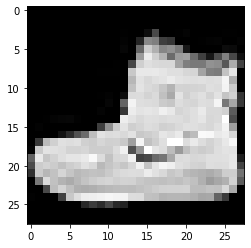

In [4]:
plt.imshow(training_images[0], 'gray')

In [5]:
print('Min: ', min(map(min, training_images[0])))
print('Max: ', max(map(max, training_images[0])))

Min:  0
Max:  255


Random 25 Images from the Training Data:


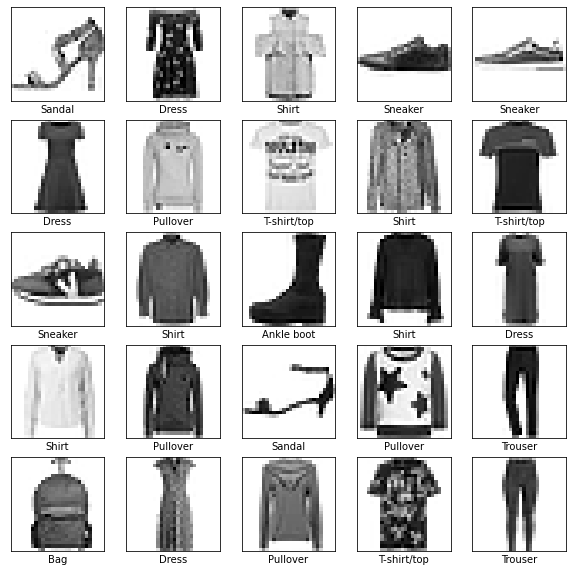

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Random 25 Images from the Training Data:")
plt.figure(figsize=(10, 10))
for i in range(25):
    rand_image_idx = np.random.randint(0, training_labels.shape[0])
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(training_images[rand_image_idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[rand_image_idx]])

Text(0.5, 1.0, 'Test labels frequency')

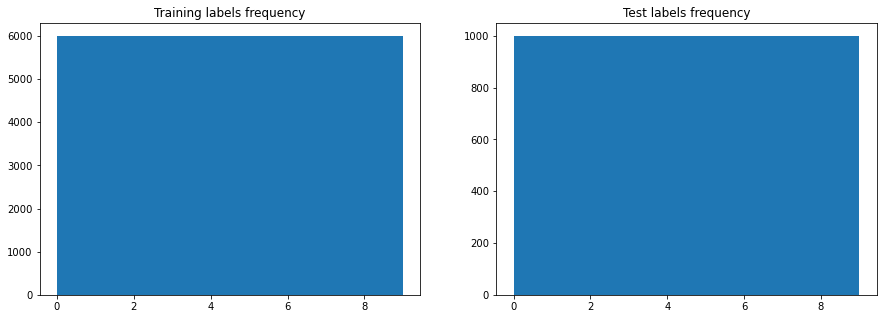

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(training_labels)
plt.title('Training labels frequency')

plt.subplot(1, 2, 2)
plt.hist(test_labels)
plt.title('Test labels frequency')

## Normalizing the images

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0

## Customizing dimensions

* Conv2D expects tensor format i.e., (batch_size, height, width, depth)

In [9]:
# training_images = np.expand_dims(training_images, 3).shape
training_images = training_images.reshape(60000, 28, 28, 1)
training_images.shape

(60000, 28, 28, 1)

In [10]:
# test_images = np.expand_dims(test_images, 3).shape
test_images = test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

## Creating the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),   # for avoiding overfitting
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])

## Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## Compiling the model

In [13]:
# # customing optimizer
# adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)  # Default parameters

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* categorical_crossentropy => expects that we have one-hot encoded the targets
* sparse_categorical_crossentropy => applies one-hot encoding

## Training the model

In [15]:
history = model.fit(x=training_images, y=training_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 750us/sample - loss: 0.5626 - acc: 0.7929
Epoch 2/10
60000/60000 [==============================] - 47s 779us/sample - loss: 0.3584 - acc: 0.8696
Epoch 3/10
60000/60000 [==============================] - 47s 790us/sample - loss: 0.3108 - acc: 0.8857
Epoch 4/10
60000/60000 [==============================] - 46s 766us/sample - loss: 0.2790 - acc: 0.8960
Epoch 5/10
60000/60000 [==============================] - 46s 761us/sample - loss: 0.2555 - acc: 0.9059
Epoch 6/10
60000/60000 [==============================] - 46s 774us/sample - loss: 0.2383 - acc: 0.9111
Epoch 7/10
60000/60000 [==============================] - 46s 772us/sample - loss: 0.2233 - acc: 0.9169
Epoch 8/10
60000/60000 [==============================] - 46s 773us/sample - loss: 0.2096 - acc: 0.9220
Epoch 9/10
60000/60000 [==============================] - 46s 772us/sample - loss: 0.1994 - acc: 0.9246
Epoch 10/10
60000/60000 [================

## Analyzing the trained model

Text(0.5, 1.0, 'Accuracy')

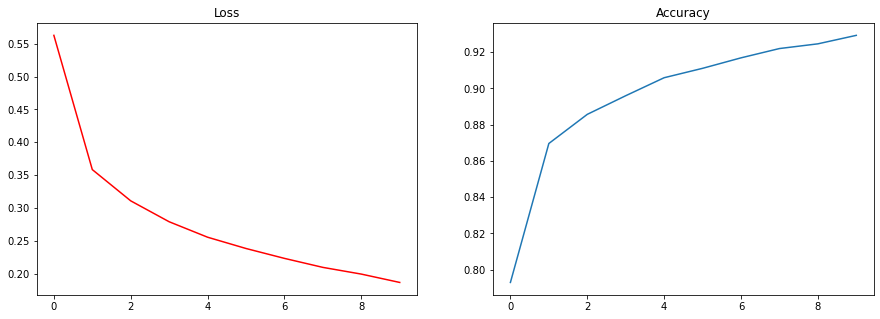

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.title('Accuracy')

## Visualizing intermediate activations

## Testing the model

In [17]:
# outputs based on model
pred1 = model.predict(test_images)
pred1

array([[8.5025551e-09, 2.7958386e-10, 3.4969555e-10, ..., 3.4058870e-05,
        1.4400600e-08, 9.7297829e-01],
       [3.3110223e-07, 1.6316117e-12, 9.0215725e-01, ..., 9.7939466e-16,
        4.2251087e-09, 1.5432922e-15],
       [2.2929396e-10, 9.9999809e-01, 4.3435727e-10, ..., 4.9664401e-22,
        1.9570810e-10, 2.6496916e-19],
       ...,
       [7.1768098e-09, 1.0745823e-11, 5.6865838e-11, ..., 7.6357729e-08,
        9.9941719e-01, 8.2255065e-09],
       [4.6880999e-10, 9.9999225e-01, 2.5045274e-08, ..., 2.4430293e-21,
        4.5394360e-10, 1.0529474e-16],
       [3.7507235e-08, 8.0526485e-10, 4.9818162e-08, ..., 3.6170701e-03,
        2.4595358e-03, 2.1537915e-05]], dtype=float32)

In [18]:
pred1.shape

(10000, 10)

In [19]:
# label-based outputs
pred2 = model.predict_classes(test_images)
pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [20]:
pred2.shape

(10000,)

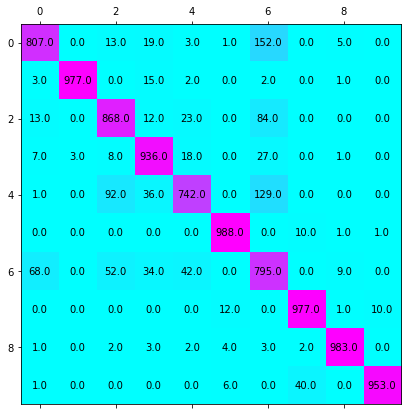

In [21]:
data = confusion_matrix(test_labels, pred2)

fig, ax = plt.subplots(figsize=(10, 7))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='cool')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [22]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 260us/sample - loss: 0.2649 - acc: 0.9026


[0.26494273208975794, 0.9026]

## Testing a single image

In [80]:
# # custom image path from directory
# img_path = 'ab.jpg'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# img_tensor = tf.keras.preprocessing.image.img_to_array(img)
# img_tensor = img_tensor/255.0

In [ ]:
# considering test image
img_tensor = test_images[4]

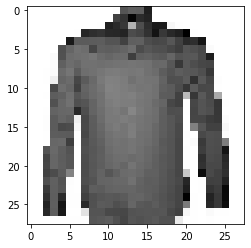

In [81]:
plt.imshow(img_tensor.reshape(28, 28), 'gray')

In [82]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [83]:
model.predict_classes(img_tensor)

array([2], dtype=int64)